In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv("sailchurn.txt", sep= '\t')
data= df[:]
df.head()

,Acct_ID,YEARS_WITH_BANK,CHURN,RISK_RATING,CURRENCY,AVE BAL,SCHEME_TYPE,MOBILE_APP_ADOPTION,INTERNET_BANKING_ADOPTION,USSD_BANKING_ADOPTION,DIGITAL_LOAN,UNSECURED_LOAN,TERMLOAN_STATUS,CREDIT_CARD,SUBSEGMENT,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE
0,Account_0,10,0,LOW,NGN,302.34,ODA,N,N,N,N,N,N,N,product7,0,0,-,-
1,Account_1,7,1,LOW,NGN,640.55,SBA,Y,Y,N,N,N,N,N,product7,23,84,"1,641,781.54","1,650,610.00"
2,Account_2,12,1,MEDIUM,NGN,"2,549.96",SBA,N,N,Y,N,N,N,N,product6,0,2,"5,427.50",-
3,Account_3,12,0,MEDIUM,USD,"9,999.17",ODA,N,Y,Y,N,N,N,N,product6,0,0,-,-
4,Account_4,12,1,MEDIUM,NGN,455.25,SBA,Y,Y,Y,N,N,N,N,product8,439,116,"6,768,632.00","6,784,830.00"


In [ ]:
df.shape

(500000, 19)

In [ ]:
df.sample(n=5, replace=False)

,Acct_ID,YEARS_WITH_BANK,CHURN,RISK_RATING,CURRENCY,AVE BAL,SCHEME_TYPE,MOBILE_APP_ADOPTION,INTERNET_BANKING_ADOPTION,USSD_BANKING_ADOPTION,DIGITAL_LOAN,UNSECURED_LOAN,TERMLOAN_STATUS,CREDIT_CARD,SUBSEGMENT,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE
206495,Account_204617,6,0,MEDIUM,NGN,93.41,SBA,Y,Y,Y,N,N,N,N,product5,0,0,-,-
399367,Account_392368,0,0,MEDIUM,NGN,-,SBA,N,N,N,N,N,N,N,product5,0,0,-,-
408521,Account_162825,7,1,LOW,USD,"6,616.36",ODA,Y,Y,Y,N,N,N,N,product7,8,62,"4,283,871.80","4,265,430.00"
488707,Account_478300,3,1,MEDIUM,NGN,"115,198.49",SBA,Y,Y,Y,N,N,N,N,product5,122,531,"1,789,366.62","1,770,737.48"
367341,Account_361351,0,1,MEDIUM,NGN,"(96,892.78)",LAA,N,N,N,N,N,N,N,product5,5,4,"146,863.26","57,203.12"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Acct_ID                        500000 non-null  object
 1   YEARS_WITH_BANK                500000 non-null  int64 
 2   CHURN                          500000 non-null  int64 
 3   RISK_RATING                    499999 non-null  object
 4   CURRENCY                       500000 non-null  object
 5    AVE BAL                       500000 non-null  object
 6   SCHEME_TYPE                    500000 non-null  object
 7   MOBILE_APP_ADOPTION            500000 non-null  object
 8   INTERNET_BANKING_ADOPTION      500000 non-null  object
 9   USSD_BANKING_ADOPTION          500000 non-null  object
 10  DIGITAL_LOAN                   500000 non-null  object
 11  UNSECURED_LOAN                 500000 non-null  object
 12  TERMLOAN_STATUS                500000 non-nu

In [ ]:
round(df.describe(), 2)

,YEARS_WITH_BANK,CHURN,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME
count,500000.00,500000.00,500000.00,500000.00
mean,5.94,0.52,51.91,111.38
std,3.73,0.50,1097.59,1221.97
min,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,0.00
50%,6.00,1.00,1.00,1.00
75%,9.00,1.00,45.00,98.00
max,12.00,1.00,754407.00,843221.00


In [ ]:
round(df.describe(include='object'), 2).T

,count,unique,top,freq
Acct_ID,500000,489075,Account_2727,19
RISK_RATING,499999,6,MEDIUM,265599
CURRENCY,500000,7,NGN,487849
AVE BAL,500000,271511,-,66013
SCHEME_TYPE,500000,6,SBA,348799
MOBILE_APP_ADOPTION,500000,2,N,343608
INTERNET_BANKING_ADOPTION,500000,2,N,313210
USSD_BANKING_ADOPTION,500000,2,N,270930
DIGITAL_LOAN,500000,2,N,488672
UNSECURED_LOAN,500000,2,N,495570


## **Data Cleaning and Preprocessing**

In [ ]:
df.columns

Index(['Acct_ID', 'YEARS_WITH_BANK', 'CHURN', 'RISK_RATING', 'CURRENCY',
       ' AVE BAL ', 'SCHEME_TYPE', 'MOBILE_APP_ADOPTION',
       'INTERNET_BANKING_ADOPTION', 'USSD_BANKING_ADOPTION', 'DIGITAL_LOAN',
       'UNSECURED_LOAN', 'TERMLOAN_STATUS', 'CREDIT_CARD', 'SUBSEGMENT',
       'LAST_12_MONTHS_CREDIT_VOLUME', 'LAST_12_MONTHS_DEBIT_VOLUME',
       ' LAST_12_MONTHS_DEBIT_VALUE ', ' LAST_12_MONTHS_CREDIT_VALUE '],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Acct_ID,0
YEARS_WITH_BANK,0
CHURN,0
RISK_RATING,1
CURRENCY,0
AVE BAL,0
SCHEME_TYPE,0
MOBILE_APP_ADOPTION,0
INTERNET_BANKING_ADOPTION,0
USSD_BANKING_ADOPTION,0


In [ ]:
# Print the unique values in each column
for column in df:
  print(column, ':', df[column].unique())

Acct_ID : ['Account_0' 'Account_1' 'Account_2' ... 'Account_489072' 'Account_489073'
 'Account_489074']
YEARS_WITH_BANK : [10  7 12 11  1  9  4  6  3  2  0  8  5]
CHURN : [0 1]
RISK_RATING : ['LOW' 'MEDIUM' 'HIGH' 'C-LOW RISK' 'A-HIGH RISK' 'B-LOW RISK' nan]
CURRENCY : ['NGN  ' 'USD  ' 'EUR  ' 'GBP  ' 'ZAR  ' 'JPY  ' 'CAD  ']
 AVE BAL  : [' 302.34 ' ' 640.55 ' ' 2,549.96 ' ... ' 3,327.66 ' ' 3,126.58 '
 ' 1,151.76 ']
SCHEME_TYPE : ['ODA  ' 'SBA  ' 'CAA  ' 'LAA  ' 'TDA  ' 'TUA  ']
MOBILE_APP_ADOPTION : ['N    ' 'Y    ']
INTERNET_BANKING_ADOPTION : ['N    ' 'Y    ']
USSD_BANKING_ADOPTION : ['N    ' 'Y    ']
DIGITAL_LOAN : ['N    ' 'Y    ']
UNSECURED_LOAN : ['N    ' 'Y    ']
TERMLOAN_STATUS : ['N    ' 'Y    ']
CREDIT_CARD : ['N    ' 'Y    ']
SUBSEGMENT : ['product7' 'product6' 'product8' 'product5' 'product2' 'product4'
 'product9' 'product1' 'product3' 'product13' 'product15' 'product11'
 'product12' 'product10']
LAST_12_MONTHS_CREDIT_VOLUME : [   0   23  439 ... 3240 2695 3844]
LAST_12_

In [ ]:
df= df.dropna(subset='RISK_RATING')

In [ ]:
df.RISK_RATING.unique()

array(['LOW', 'MEDIUM', 'HIGH', 'C-LOW RISK', 'A-HIGH RISK', 'B-LOW RISK'],
      dtype=object)

In [ ]:
df.isnull().values.any()

False

In [ ]:
len(df.Acct_ID.unique())

489074

The total no of column is 500,000, this shows that there are duplicate values

In [ ]:
duplicates= df.duplicated(subset= 'Acct_ID')
len(df[duplicates])

10925

There are 10,925 duplicated rows

In [ ]:
df[duplicates].sample(5)

,Acct_ID,YEARS_WITH_BANK,CHURN,RISK_RATING,CURRENCY,AVE BAL,SCHEME_TYPE,MOBILE_APP_ADOPTION,INTERNET_BANKING_ADOPTION,USSD_BANKING_ADOPTION,DIGITAL_LOAN,UNSECURED_LOAN,TERMLOAN_STATUS,CREDIT_CARD,SUBSEGMENT,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE
317924,Account_74581,9,0,MEDIUM,NGN,"(187,586.05)",LAA,N,N,N,N,Y,N,N,product8,0,0,-,-
437473,Account_15207,0,1,LOW,USD,"27,110,776.58",SBA,Y,Y,N,N,N,N,N,product7,6,2,"2,049,368.31","26,328,565.25"
175687,Account_4971,12,1,LOW,NGN,"(1,015,372.23)",LAA,Y,Y,Y,N,Y,N,N,product5,45,102,"2,968,839.13","2,448,820.14"
248527,Account_212017,8,1,MEDIUM,NGN,"(219,593.80)",LAA,N,N,Y,N,Y,N,N,product5,59,93,"903,714.47","954,459.44"
401016,Account_103453,4,1,LOW,NGN,140.17,ODA,Y,Y,Y,N,N,N,N,product7,56,175,"4,472,376.83","4,451,707.52"


In [ ]:
df= df.drop_duplicates(subset='Acct_ID')
len(df)

489074

In [ ]:
df.columns

Index(['Acct_ID', 'YEARS_WITH_BANK', 'CHURN', 'RISK_RATING', 'CURRENCY',
       ' AVE BAL ', 'SCHEME_TYPE', 'MOBILE_APP_ADOPTION',
       'INTERNET_BANKING_ADOPTION', 'USSD_BANKING_ADOPTION', 'DIGITAL_LOAN',
       'UNSECURED_LOAN', 'TERMLOAN_STATUS', 'CREDIT_CARD', 'SUBSEGMENT',
       'LAST_12_MONTHS_CREDIT_VOLUME', 'LAST_12_MONTHS_DEBIT_VOLUME',
       ' LAST_12_MONTHS_DEBIT_VALUE ', ' LAST_12_MONTHS_CREDIT_VALUE '],
      dtype='object')

In [ ]:
labels= {
    ' AVE BAL ': "AVERAGE_BALANCE",
    ' LAST_12_MONTHS_DEBIT_VALUE ': 'LAST_12_MONTHS_DEBIT_VALUE',
    ' LAST_12_MONTHS_CREDIT_VALUE ': 'LAST_12_MONTHS_CREDIT_VALUE'
}
df= df.rename(columns= labels)
df.sample(5)

,Acct_ID,YEARS_WITH_BANK,CHURN,RISK_RATING,CURRENCY,AVERAGE_BALANCE,SCHEME_TYPE,MOBILE_APP_ADOPTION,INTERNET_BANKING_ADOPTION,USSD_BANKING_ADOPTION,DIGITAL_LOAN,UNSECURED_LOAN,TERMLOAN_STATUS,CREDIT_CARD,SUBSEGMENT,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE
227362,Account_225057,1,0,MEDIUM,NGN,-,SBA,N,N,N,N,N,N,N,product5,0,0,-,-
331722,Account_326791,5,1,LOW,NGN,"9,545.52",SBA,Y,Y,N,N,N,N,N,product7,388,519,"17,413,878.30","16,901,823.59"
264893,Account_261742,7,1,LOW,EUR,"25,552.44",ODA,Y,Y,N,N,N,N,N,product6,14,35,"9,719,320.00","9,889,100.00"
190477,Account_188873,1,0,MEDIUM,NGN,-,SBA,N,N,N,N,N,N,N,product5,0,0,-,-
460997,Account_451724,1,0,MEDIUM,NGN,147.62,SBA,N,N,N,N,N,N,N,product7,0,0,-,-


In [ ]:
df= df.drop('Acct_ID', axis="columns")

In [ ]:
df['AVERAGE_BALANCE'].values

array([' 302.34 ', ' 640.55 ', ' 2,549.96 ', ..., ' 60.58 ', ' 1,151.76 ',
       ' -   '], dtype=object)

In [ ]:
df['LAST_12_MONTHS_DEBIT_VALUE'].values

array([' -   ', ' 1,641,781.54 ', ' 5,427.50 ', ..., ' -   ', ' -   ',
       ' -   '], dtype=object)

In [ ]:
df['LAST_12_MONTHS_CREDIT_VALUE'].values

array([' -   ', ' 1,650,610.00 ', ' -   ', ..., ' -   ', ' -   ', ' -   '],
      dtype=object)

In [ ]:
df['LAST_12_MONTHS_DEBIT_VOLUME'].values

array([ 0, 84,  2, ...,  0,  0,  0])

In [ ]:
df['LAST_12_MONTHS_CREDIT_VOLUME'].values

array([ 0, 23,  0, ...,  0,  0,  0])

In [ ]:
# Remove white space from values these columns
columns_with_withspace= ['AVERAGE_BALANCE','LAST_12_MONTHS_DEBIT_VALUE','LAST_12_MONTHS_CREDIT_VALUE']
df[columns_with_withspace]= df[columns_with_withspace].apply(lambda x: x.str.strip())

In [ ]:
df['LAST_12_MONTHS_CREDIT_VALUE'].values

array(['-', '1,650,610.00', '-', ..., '-', '-', '-'], dtype=object)

In [ ]:
df['LAST_12_MONTHS_DEBIT_VALUE'].values

array(['-', '1,641,781.54', '5,427.50', ..., '-', '-', '-'], dtype=object)

In [ ]:
df['AVERAGE_BALANCE'].values

array(['302.34', '640.55', '2,549.96', ..., '60.58', '1,151.76', '-'],
      dtype=object)

In [ ]:
# number of '-' in AVERAGE_BALANCE
df[df['AVERAGE_BALANCE']== '-'][:5]

,YEARS_WITH_BANK,CHURN,RISK_RATING,CURRENCY,AVERAGE_BALANCE,SCHEME_TYPE,MOBILE_APP_ADOPTION,INTERNET_BANKING_ADOPTION,USSD_BANKING_ADOPTION,DIGITAL_LOAN,UNSECURED_LOAN,TERMLOAN_STATUS,CREDIT_CARD,SUBSEGMENT,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE
18,7,0,MEDIUM,NGN,-,SBA,N,N,N,N,N,N,N,product8,0,0,-,-
25,1,1,MEDIUM,NGN,-,SBA,N,N,Y,N,N,N,N,product8,20,17,"92,454.70","88,857.44"
26,3,1,MEDIUM,NGN,-,SBA,N,N,Y,N,N,N,N,product5,40,73,"290,030.00","373,620.00"
30,0,0,LOW,NGN,-,SBA,N,N,Y,N,N,N,N,product5,0,0,-,-
73,1,0,LOW,NGN,-,SBA,N,N,N,N,N,N,N,product5,0,0,-,-


In [ ]:
len(df[df.AVERAGE_BALANCE =='-'])

64904

In [ ]:
len(df[df.LAST_12_MONTHS_CREDIT_VALUE== '-'])

228175

In [ ]:
len(df[df.LAST_12_MONTHS_DEBIT_VALUE== '-'])

247082

In [ ]:
df['AVERAGE_BALANCE'] = df['AVERAGE_BALANCE'].astype(str).str.replace('(', '').replace(')', '').replace(',', '')


In [ ]:
df['AVERAGE_BALANCE']= df['AVERAGE_BALANCE'].astype(str).str.replace("(", "")
df['AVERAGE_BALANCE']= df['AVERAGE_BALANCE'].astype(str).str.replace(")", "")
df['AVERAGE_BALANCE']= df['AVERAGE_BALANCE'].astype(str).str.replace(",", "")

In [ ]:
df['LAST_12_MONTHS_DEBIT_VALUE']= df['LAST_12_MONTHS_DEBIT_VALUE'].astype(str).str.replace(',', '')
df['LAST_12_MONTHS_CREDIT_VALUE']= df['LAST_12_MONTHS_CREDIT_VALUE'].astype(str).str.replace(',', '')

In [ ]:
df['AVERAGE_BALANCE'].values

array(['302.34', '640.55', '2549.96', ..., '60.58', '1151.76', '-'],
      dtype=object)

In [ ]:
df['LAST_12_MONTHS_DEBIT_VALUE'].values

array(['-', '1641781.54', '5427.50', ..., '-', '-', '-'], dtype=object)

In [ ]:
df['LAST_12_MONTHS_CREDIT_VALUE'].values

array(['-', '1650610.00', '-', ..., '-', '-', '-'], dtype=object)

In [ ]:
df['AVERAGE_BALANCE']= df['AVERAGE_BALANCE'].replace('-', np.nan).astype(float)
average_balance_mean= round(df['AVERAGE_BALANCE'].mean(axis=0), 2)
average_balance_mean

239961.41

In [ ]:
df['LAST_12_MONTHS_DEBIT_VALUE']= df['LAST_12_MONTHS_DEBIT_VALUE'].replace('-', np.nan).astype(float)
debit_value_mean= round(df['LAST_12_MONTHS_DEBIT_VALUE'].mean(axis=0), 2)
debit_value_mean

24010740.76

In [ ]:
df['LAST_12_MONTHS_CREDIT_VALUE']= df['LAST_12_MONTHS_CREDIT_VALUE'].replace('-', np.nan).astype(float)
credit_value_mean= round(df['LAST_12_MONTHS_CREDIT_VALUE'].mean(axis=0), 2)
credit_value_mean

25820048.47

In [ ]:
df['AVERAGE_BALANCE'].replace(np.nan, average_balance_mean, inplace=True)
df['LAST_12_MONTHS_DEBIT_VALUE'].replace(np.nan, debit_value_mean, inplace=True)
df['LAST_12_MONTHS_CREDIT_VALUE'].replace(np.nan, credit_value_mean, inplace=True)

In [ ]:
df['AVERAGE_BALANCE'].values

array([3.0234000e+02, 6.4055000e+02, 2.5499600e+03, ..., 6.0580000e+01,
       1.1517600e+03, 2.3996141e+05])

In [ ]:
df['LAST_12_MONTHS_DEBIT_VALUE'].values

array([2.40107408e+07, 1.64178154e+06, 5.42750000e+03, ...,
       2.40107408e+07, 2.40107408e+07, 2.40107408e+07])

In [ ]:
df['LAST_12_MONTHS_CREDIT_VALUE'].values

array([25820048.47,  1650610.  , 25820048.47, ..., 25820048.47,
       25820048.47, 25820048.47])

In [ ]:
df_uniques= df.nunique()
df_uniques

,0
YEARS_WITH_BANK,13
CHURN,2
RISK_RATING,6
CURRENCY,6
AVERAGE_BALANCE,263781
SCHEME_TYPE,6
MOBILE_APP_ADOPTION,2
INTERNET_BANKING_ADOPTION,2
USSD_BANKING_ADOPTION,2
DIGITAL_LOAN,2


In [ ]:
df_uniques[(df_uniques > 2) & (df_uniques < 15)]

,0
YEARS_WITH_BANK,13
RISK_RATING,6
CURRENCY,6
SCHEME_TYPE,6
SUBSEGMENT,14


In [ ]:
binary_variable= list(df_uniques[df_uniques == 2].index)
binary_variable

['CHURN',
 'MOBILE_APP_ADOPTION',
 'INTERNET_BANKING_ADOPTION',
 'USSD_BANKING_ADOPTION',
 'DIGITAL_LOAN',
 'UNSECURED_LOAN',
 'TERMLOAN_STATUS',
 'CREDIT_CARD']

In [ ]:
list(df_uniques[df_uniques < 15].index)

['YEARS_WITH_BANK',
 'CHURN',
 'RISK_RATING',
 'CURRENCY',
 'SCHEME_TYPE',
 'MOBILE_APP_ADOPTION',
 'INTERNET_BANKING_ADOPTION',
 'USSD_BANKING_ADOPTION',
 'DIGITAL_LOAN',
 'UNSECURED_LOAN',
 'TERMLOAN_STATUS',
 'CREDIT_CARD',
 'SUBSEGMENT']

In [ ]:
categorical_variables= list(df_uniques[df_uniques < 15].index)
categorical_variables

['YEARS_WITH_BANK',
 'CHURN',
 'RISK_RATING',
 'CURRENCY',
 'SCHEME_TYPE',
 'MOBILE_APP_ADOPTION',
 'INTERNET_BANKING_ADOPTION',
 'USSD_BANKING_ADOPTION',
 'DIGITAL_LOAN',
 'UNSECURED_LOAN',
 'TERMLOAN_STATUS',
 'CREDIT_CARD',
 'SUBSEGMENT']

In [ ]:
# show a list of columns in the categorical variables and a list of its contents
[[i, list(df[i].unique())] for i in categorical_variables]

[['YEARS_WITH_BANK', [10, 7, 12, 11, 1, 9, 4, 6, 3, 2, 0, 8, 5]],
 ['CHURN', [0, 1]],
 ['RISK_RATING',
  ['LOW', 'MEDIUM', 'HIGH', 'C-LOW RISK', 'A-HIGH RISK', 'B-LOW RISK']],
 ['CURRENCY', ['NGN  ', 'USD  ', 'EUR  ', 'GBP  ', 'ZAR  ', 'JPY  ']],
 ['SCHEME_TYPE', ['ODA  ', 'SBA  ', 'CAA  ', 'LAA  ', 'TDA  ', 'TUA  ']],
 ['MOBILE_APP_ADOPTION', ['N    ', 'Y    ']],
 ['INTERNET_BANKING_ADOPTION', ['N    ', 'Y    ']],
 ['USSD_BANKING_ADOPTION', ['N    ', 'Y    ']],
 ['DIGITAL_LOAN', ['N    ', 'Y    ']],
 ['UNSECURED_LOAN', ['N    ', 'Y    ']],
 ['TERMLOAN_STATUS', ['N    ', 'Y    ']],
 ['CREDIT_CARD', ['N    ', 'Y    ']],
 ['SUBSEGMENT',
  ['product7',
   'product6',
   'product8',
   'product5',
   'product2',
   'product4',
   'product9',
   'product1',
   'product3',
   'product13',
   'product15',
   'product11',
   'product12',
   'product10']]]

In [ ]:
ordinal_variable= ['YEARS_WITH_BANK', 'RISK_RATING']

In [ ]:
continuous_variables= list(set(df.columns) - set(categorical_variables))
continuous_variables

['LAST_12_MONTHS_CREDIT_VOLUME',
 'LAST_12_MONTHS_DEBIT_VOLUME',
 'AVERAGE_BALANCE',
 'LAST_12_MONTHS_DEBIT_VALUE',
 'LAST_12_MONTHS_CREDIT_VALUE']

In [ ]:
df[continuous_variables].info()

<class 'pandas.core.frame.DataFrame'>
Index: 489074 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   LAST_12_MONTHS_CREDIT_VOLUME  489074 non-null  int64  
 1   LAST_12_MONTHS_DEBIT_VOLUME   489074 non-null  int64  
 2   AVERAGE_BALANCE               489074 non-null  float64
 3   LAST_12_MONTHS_DEBIT_VALUE    489074 non-null  float64
 4   LAST_12_MONTHS_CREDIT_VALUE   489074 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 22.4 MB


In [ ]:
df[continuous_variables]= df[continuous_variables].astype(float)

## **Univariate Analysis**

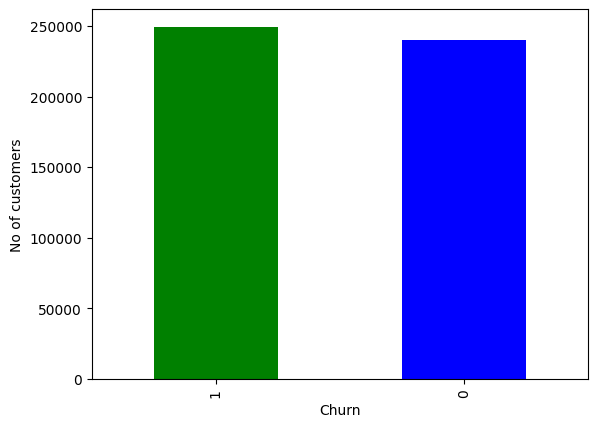

In [ ]:
ax= df.CHURN.value_counts().plot.bar(color=['green', 'blue'])
ax.set(xlabel='Churn', ylabel='No of customers')
plt.show()

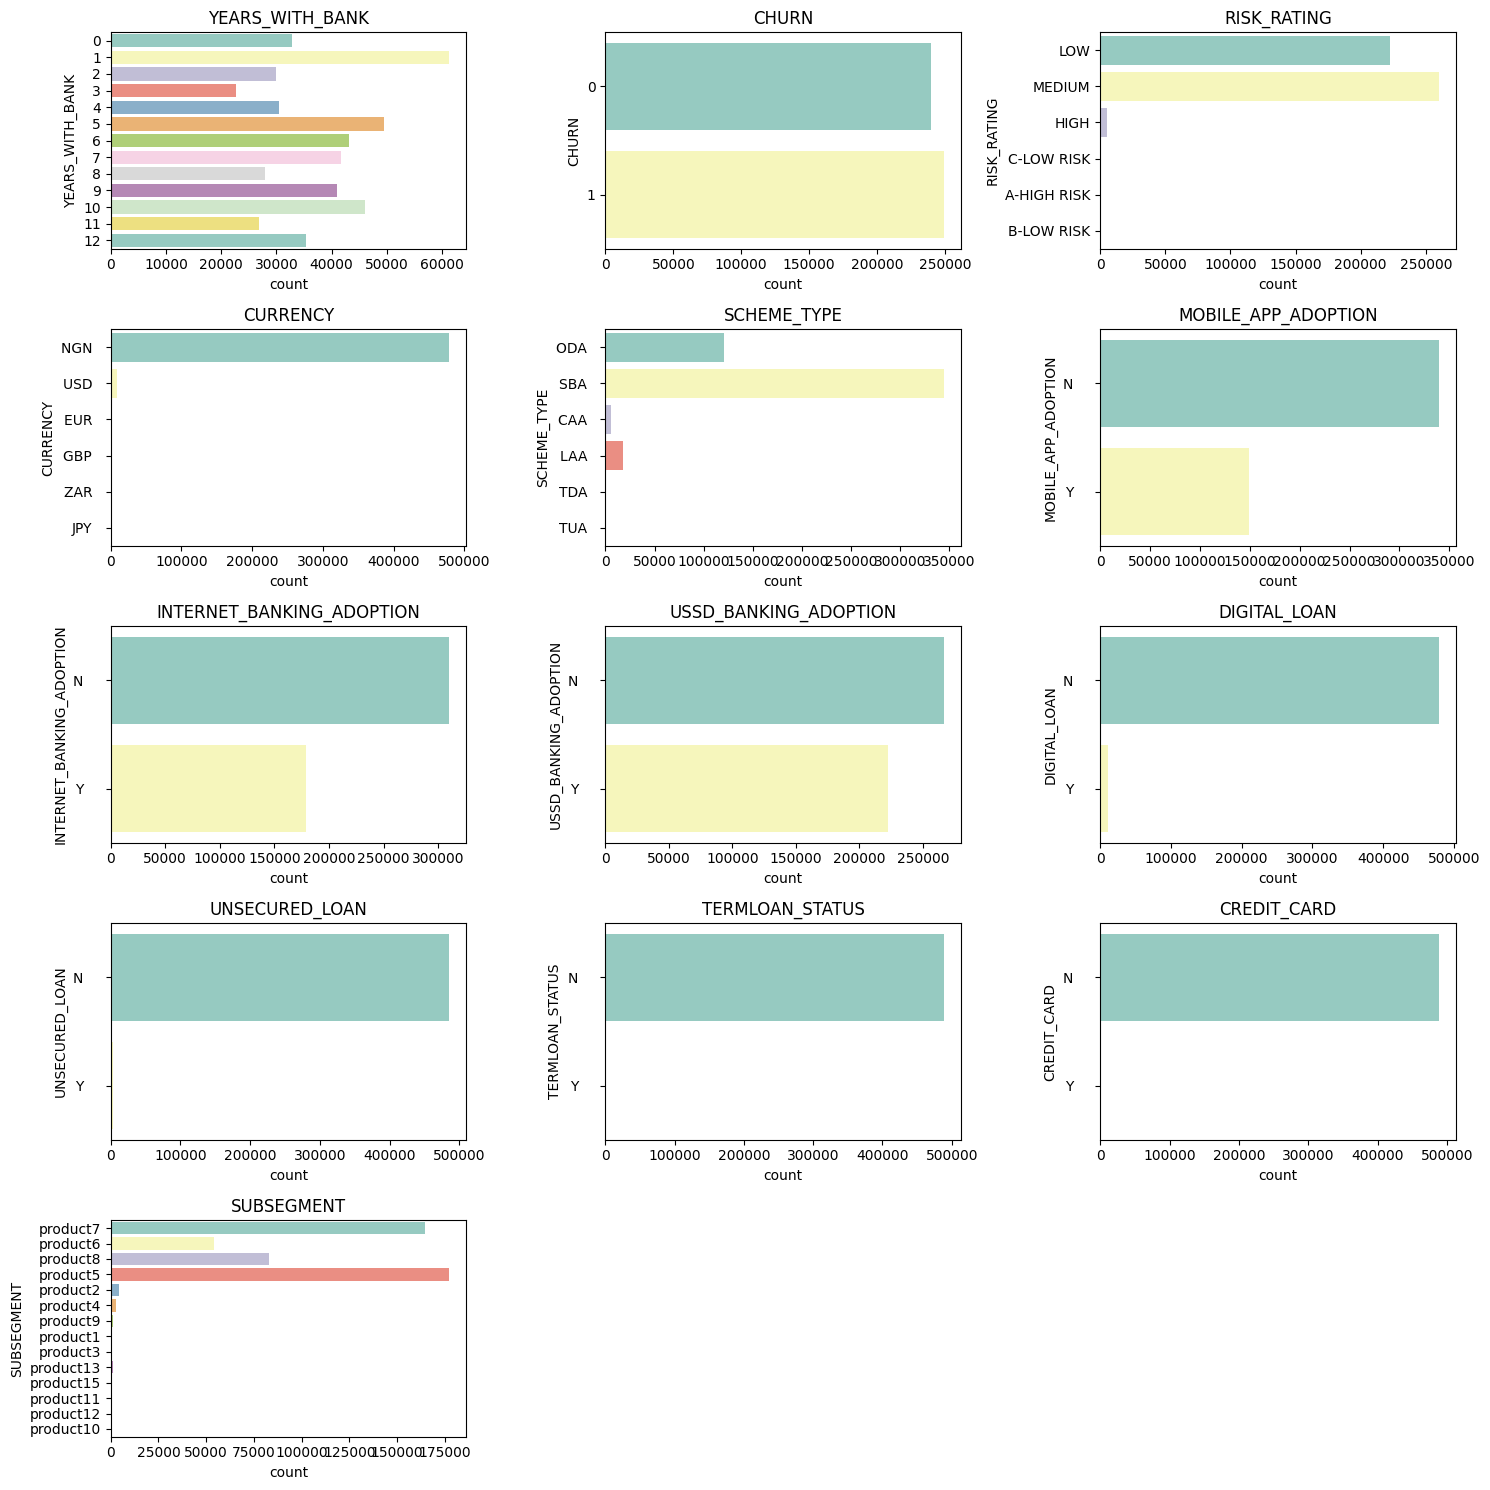

In [ ]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_variables, 1):
  plt.subplot(5, 3, i)
  sns.countplot(y=df[column], palette= 'Set3')
  plt.title(column)
  plt.tight_layout()
plt.show()

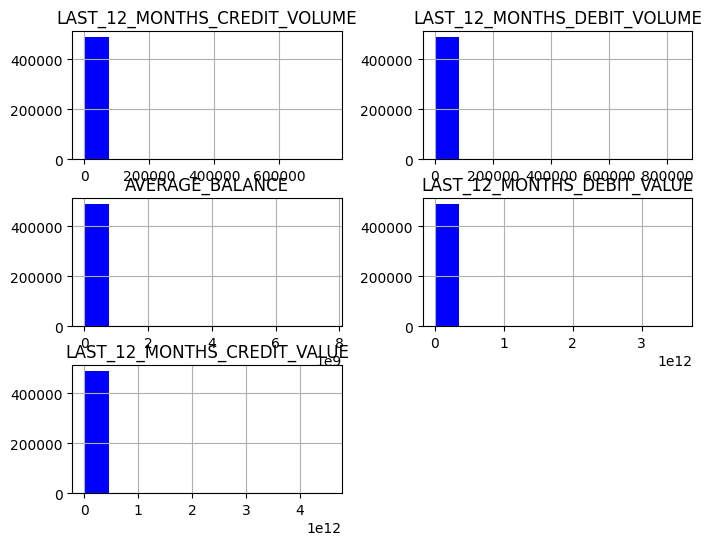

In [ ]:
df[continuous_variables].hist(color= 'blue', figsize=(8, 6))
plt.show()

In [ ]:
skew_limit= 0.75
skew_values= df[continuous_variables].skew()
skew_values

,0
LAST_12_MONTHS_CREDIT_VOLUME,651.398479
LAST_12_MONTHS_DEBIT_VOLUME,654.334993
AVERAGE_BALANCE,603.393813
LAST_12_MONTHS_DEBIT_VALUE,699.229311
LAST_12_MONTHS_CREDIT_VALUE,699.259258


In [ ]:
skew_columns= (skew_values
               .sort_values(ascending=False)
               .to_frame()
               .rename(columns={0: 'skew'})
               .query('abs(skew) > {}'.format(skew_limit)))
skew_columns

,skew
LAST_12_MONTHS_CREDIT_VALUE,699.259258
LAST_12_MONTHS_DEBIT_VALUE,699.229311
LAST_12_MONTHS_DEBIT_VOLUME,654.334993
LAST_12_MONTHS_CREDIT_VOLUME,651.398479
AVERAGE_BALANCE,603.393813


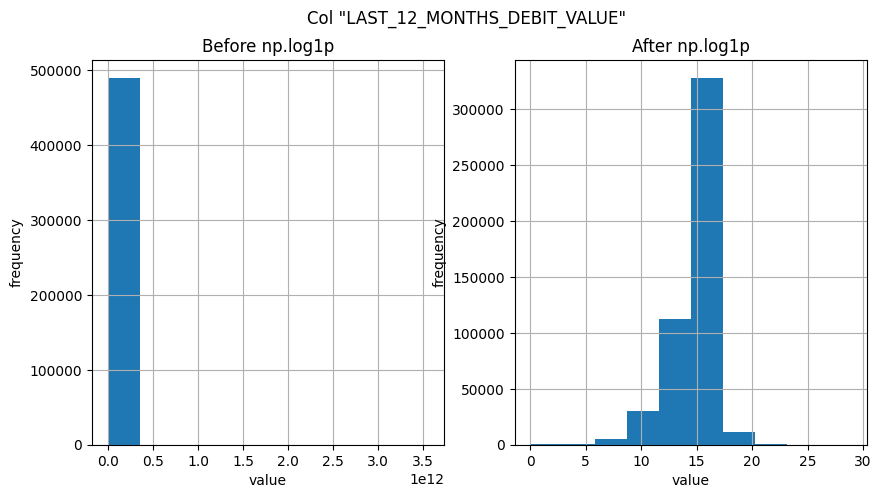

In [ ]:
col= 'LAST_12_MONTHS_DEBIT_VALUE'

fig, (ax_before, ax_after)= plt.subplots(1, 2, figsize=(10, 5))
df[col].hist(ax= ax_before)
df[col].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title= 'Before np.log1p', ylabel= 'frequency', xlabel='value')
ax_after.set(title= 'After np.log1p', ylabel= 'frequency', xlabel='value')
fig.suptitle('Col "{}"'.format(col))
plt.show()

In [ ]:
for column in skew_columns.index.values:
  #if column== 'LAST_12_MONTHS_DEBIT_VALUE':
    #continue
  df[column]= df[column].apply(np.log1p)

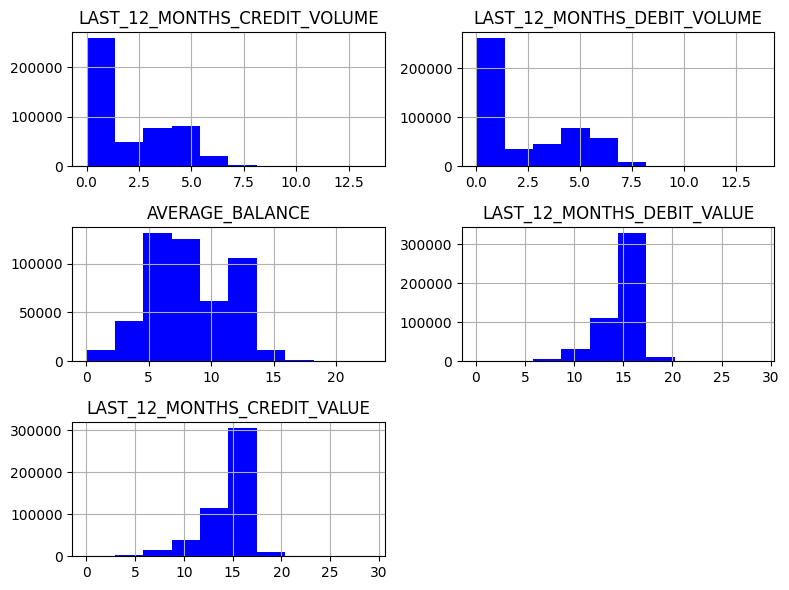

In [ ]:
df[continuous_variables].hist(color='blue', figsize=(8, 6))
plt.tight_layout()
plt.show()

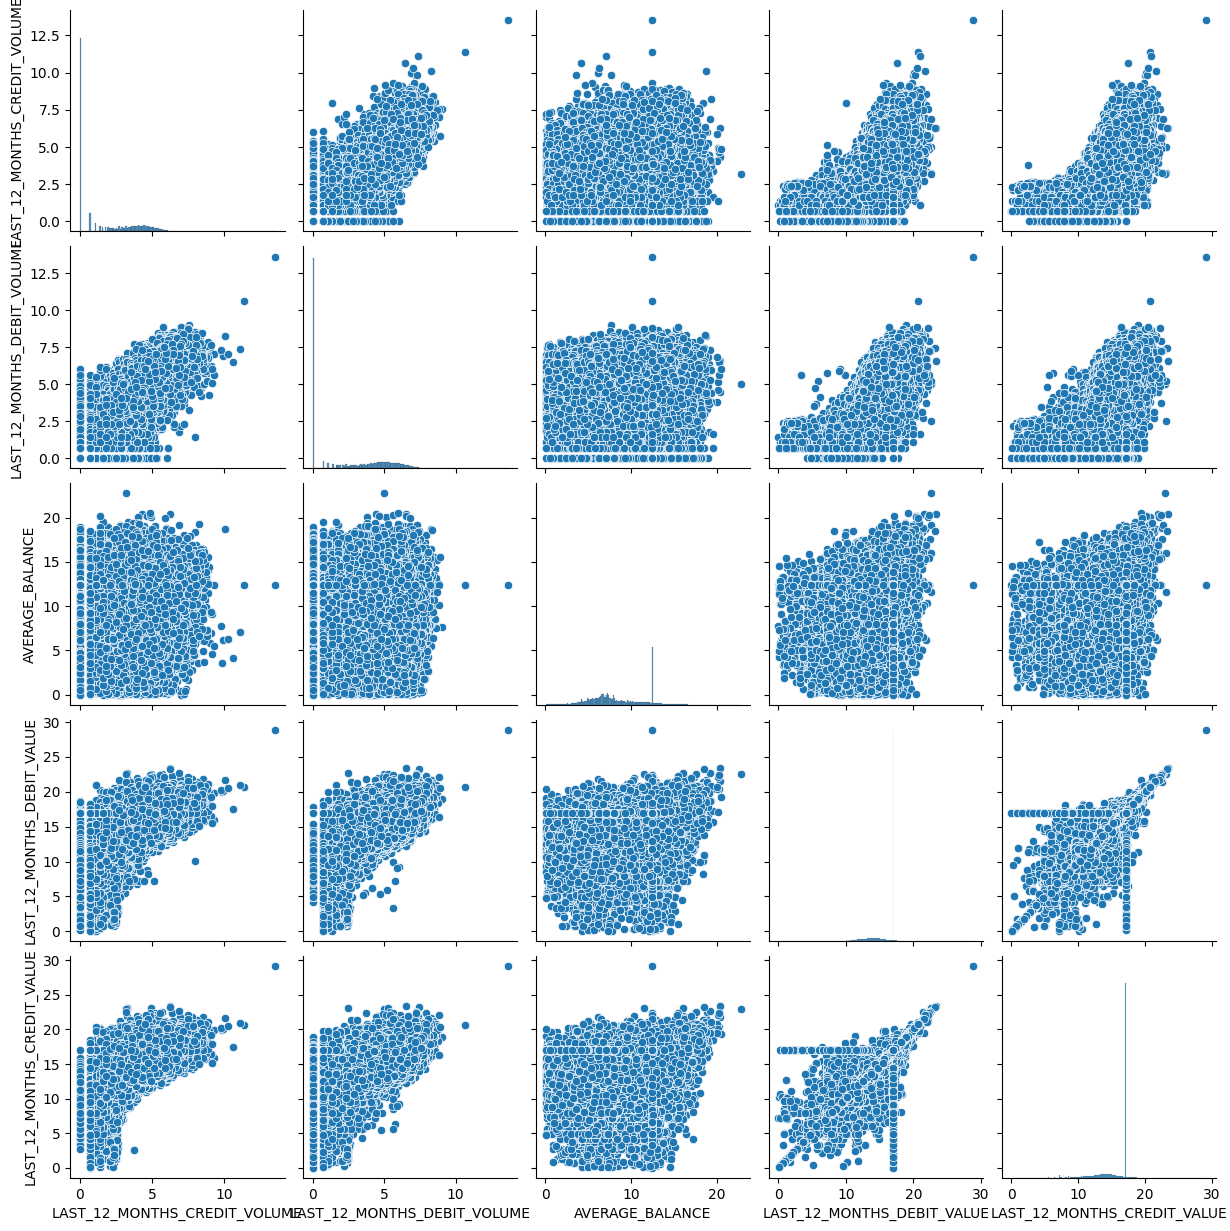

In [ ]:
sns.pairplot(df[continuous_variables])

In [ ]:
categorical_variables= list(set(categorical_variables)- set(['CHURN']) - set(ordinal_variable))
categorical_variables

['USSD_BANKING_ADOPTION',
 'MOBILE_APP_ADOPTION',
 'UNSECURED_LOAN',
 'SUBSEGMENT',
 'CURRENCY',
 'DIGITAL_LOAN',
 'TERMLOAN_STATUS',
 'CREDIT_CARD',
 'SCHEME_TYPE',
 'INTERNET_BANKING_ADOPTION']

In [ ]:
df2= pd.get_dummies(df, columns= categorical_variables, drop_first=True, dtype=int)
df2.sample(5)

,YEARS_WITH_BANK,CHURN,RISK_RATING,AVERAGE_BALANCE,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE,USSD_BANKING_ADOPTION_Y,MOBILE_APP_ADOPTION_Y,...,CURRENCY_ZAR,DIGITAL_LOAN_Y,TERMLOAN_STATUS_Y,CREDIT_CARD_Y,SCHEME_TYPE_LAA,SCHEME_TYPE_ODA,SCHEME_TYPE_SBA,SCHEME_TYPE_TDA,SCHEME_TYPE_TUA,INTERNET_BANKING_ADOPTION_Y
409283,9,0,MEDIUM,6.615757,0.000000,0.000000,16.994012,17.066662,1,0,...,0,0,0,0,0,1,0,0,0,0
25586,7,0,MEDIUM,5.128122,0.000000,0.000000,16.994012,17.066662,0,0,...,0,0,0,0,0,0,1,0,0,0
13524,9,1,MEDIUM,7.140001,2.890372,2.564949,11.787720,11.799990,1,0,...,0,0,0,0,0,1,0,0,0,0
330621,10,1,LOW,11.787996,4.762174,4.262680,15.547844,15.634483,1,1,...,0,0,0,0,0,1,0,0,0,1
295275,0,1,MEDIUM,6.937508,1.098612,1.609438,12.517231,12.517231,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
le= LabelEncoder()

for column in ordinal_variable:
  df2[column]= le.fit_transform(df2[column])

In [ ]:
df2[ordinal_variable].astype('category').describe()

,YEARS_WITH_BANK,RISK_RATING
count,489074,489074
unique,13,6
top,1,5
freq,61301,260047


In [ ]:
df2[:5]

,YEARS_WITH_BANK,CHURN,RISK_RATING,AVERAGE_BALANCE,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE,USSD_BANKING_ADOPTION_Y,MOBILE_APP_ADOPTION_Y,...,CURRENCY_ZAR,DIGITAL_LOAN_Y,TERMLOAN_STATUS_Y,CREDIT_CARD_Y,SCHEME_TYPE_LAA,SCHEME_TYPE_ODA,SCHEME_TYPE_SBA,SCHEME_TYPE_TDA,SCHEME_TYPE_TUA,INTERNET_BANKING_ADOPTION_Y
0,10,0,4,5.714854,0.000000,0.000000,16.994012,17.066662,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7,1,4,6.463887,3.178054,4.442651,14.311293,14.316656,0,1,...,0,0,0,0,0,0,1,0,0,1
2,12,1,5,7.844225,0.000000,1.098612,8.599418,17.066662,1,0,...,0,0,0,0,0,0,1,0,0,0
3,12,0,5,9.210357,0.000000,0.000000,16.994012,17.066662,1,0,...,0,0,0,0,0,1,0,0,0,1
4,12,1,5,6.123041,6.086775,4.762174,15.727810,15.730200,1,1,...,0,0,0,0,0,0,1,0,0,1


## **Standardization**

In [ ]:
sc= StandardScaler()
df2[continuous_variables]= sc.fit_transform(df2[continuous_variables])
df2[continuous_variables][:5]

,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,AVERAGE_BALANCE,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE
0,-0.898593,-0.868573,-0.801056,0.697787,0.730495
1,0.637842,0.937983,-0.565594,-0.471968,-0.273800
2,-0.898593,-0.421834,-0.131680,-2.962536,0.730495
3,-0.898593,-0.868573,0.297769,0.697787,0.730495
4,2.044067,1.067914,-0.672741,0.145681,0.242423


## **Train and test set splitting**

In [ ]:
# Set up X and y variables
y, X= df2['CHURN'], df2.drop(columns='CHURN')

In [ ]:
y.shape, X.shape

((489074,), (489074, 37))

In [ ]:
# Split train and test set

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=234)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((391259, 37), (97815, 37), (391259,), (97815,))

In [ ]:
y_train.value_counts()

,count
CHURN,
1,199388
0,191871


In [77]:
y_test.value_counts()

,count
CHURN,
1,49972
0,47843


## **Model Building**

## **Gradient Boosting Classifier**

In [ ]:
error_list= list()
tree_list= [15, 25, 50, 100, 200, 400]

for n_trees in tree_list:
  GBC= GradientBoostingClassifier(n_estimators=n_trees, random_state=234)

  # Fit the model
  print(f"Fitting model with {n_trees} trees")
  GBC.fit(X_train.values, y_train.values)
  y_pred= GBC.predict(X_test)

  # Get the error
  error= 1 - accuracy_score(y_pred, y_test)

  # Store the error
  error_list.append(pd.Series({"n_trees": n_trees, "error": error}))

error_df= pd.concat(error_list, axis=1).T.set_index('n_trees')
error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,error
n_trees,
15.0,0.055677
25.0,0.055032
50.0,0.050176
100.0,0.047089
200.0,0.044758
400.0,0.043797


In [ ]:
import pickle

# Save the model
pickle.dump(GBC, open('gbc.p', 'wb'))

# Load the model
GBC= pickle.load(open('gbc.p', 'rb'))

### **Plot the result**

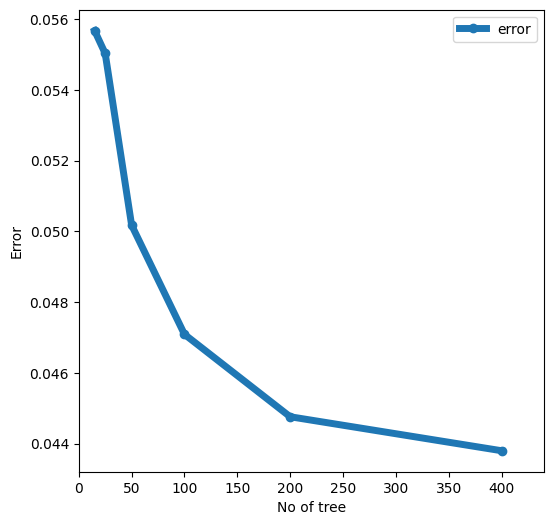

In [ ]:
#sns.set_context("talk")
#sns.set_style('white')

ax= error_df.plot(marker='o', figsize=(6, 6), linewidth=5)
ax.set(xlabel= 'No of tree', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     47843
           1       0.95      0.97      0.96     49972

    accuracy                           0.96     97815
   macro avg       0.96      0.96      0.96     97815
weighted avg       0.96      0.96      0.96     97815



In [ ]:
# Function to generate test accuracy and training accuracy
def get_accuracy(X_train, X_test, y_train, y_test, model):
  return{'Test Accuracy':accuracy_score(y_test, model.predict(X_test)),
         'Training Accuracy': accuracy_score(y_train, model.predict(X_train))}

In [ ]:
# Check for overfitting
get_accuracy(X_train, X_test, y_train, y_test, GBC)

{'Test Accuracy': 0.956203036344119, 'Training Accuracy': 0.9569441214131815}

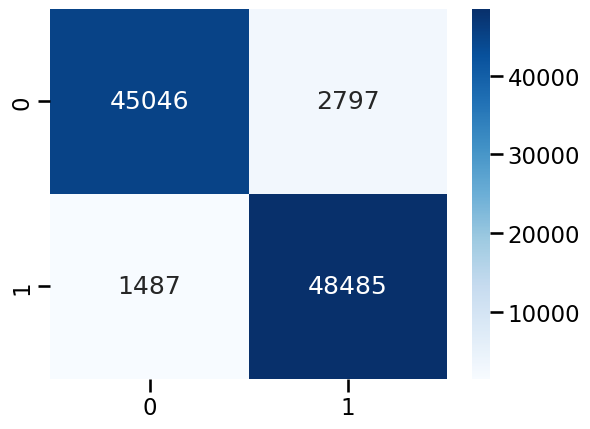

In [ ]:
sns.set_context('talk')
cm= confusion_matrix(y_test, y_pred)
ax= sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## **XGBoost Classifier**

In [ ]:
xgb= XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred= xgb.predict(X_test)

In [ ]:
print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     46414
           1       0.97      0.95      0.96     51401

    accuracy                           0.96     97815
   macro avg       0.96      0.96      0.96     97815
weighted avg       0.96      0.96      0.96     97815



In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, xgb)

{'Test Accuracy': 0.9568675561008025, 'Training Accuracy': 0.9598731275191114}

In [ ]:
tree_list = [50, 100, 200, 400]

best_score = 0
best_model = None
best_n_tree = None

for n_tree in tree_list:
    model = XGBClassifier(objective='binary:logistic',
                          n_estimators=n_tree,
                          eval_metric='mlogloss')

    print(f"Fitting model with {n_tree} trees")
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test)

    # Evaluate the model
    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {n_tree} trees: {score:.4f}")

    # Check if this model is the best
    if score > best_score:
        best_score = score
        best_model = model
        best_n_tree = n_tree

# Print the best score and the best number of trees
print(f"\nBest accuracy score: {best_score:.4f} with {best_n_tree} trees")

# Save the best model to a file
with open('best_xgb_model.p', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_xgb_model.p'")

Fitting model with 50 trees
Accuracy for 50 trees: 0.9567
Fitting model with 100 trees
Accuracy for 100 trees: 0.9569
Fitting model with 200 trees
Accuracy for 200 trees: 0.9571
Fitting model with 400 trees
Accuracy for 400 trees: 0.9566

Best accuracy score: 0.9571 with 200 trees
Best model saved as 'best_xgb_model.p'


In [ ]:
model= pickle.load(open('best_xgb_model.p', 'rb'))

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, model)

{'Test Accuracy': 0.9570515769564996, 'Training Accuracy': 0.9623420803099737}

In [ ]:
y_pred= model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     46450
           1       0.97      0.95      0.96     51365

    accuracy                           0.96     97815
   macro avg       0.96      0.96      0.96     97815
weighted avg       0.96      0.96      0.96     97815



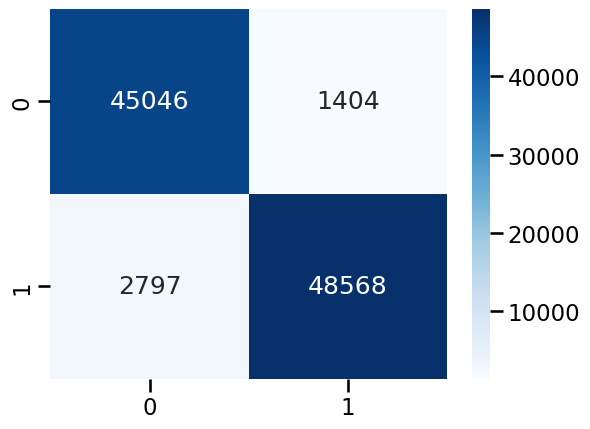

In [ ]:
sns.set_context("talk")
cm= confusion_matrix(y_pred, y_test)
ax= sns.heatmap(cm, annot=True, fmt= 'd', cmap= 'Blues')

### **Tuning XGBoost Classifier with gridsearch**

In [ ]:
XGB= XGBClassifier(objective='binary:logistic', eval_metric='mlogloss')

param_grid= {'n_estimators': [50, 100, 200, 400],
             'learning_rate': [0.1, 0.01, 0.001]}

search= GridSearchCV(estimator= XGB,
                     param_grid= param_grid,
                     scoring= "accuracy")
search.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='accuracy')

In [ ]:
print(get_accuracy(X_train, X_test, y_train, y_test, search))

{'Test Accuracy': 0.9571026938608598, 'Training Accuracy': 0.9605964335644676}


In [ ]:
search.best_score_

0.956898116727259

In [ ]:
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 400}

In [ ]:
best_xgb= search.best_estimator_

# Save the model
pickle.dump(best_xgb, (open('xgb_Bchurn.p', 'wb')))

# Load the model
model2= pickle.load(open('xgb_Bchurn.p', 'rb'))

In [ ]:
gs_pred= model2.predict(X_test)
print(classification_report(gs_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     46395
           1       0.97      0.95      0.96     51420

    accuracy                           0.96     97815
   macro avg       0.96      0.96      0.96     97815
weighted avg       0.96      0.96      0.96     97815



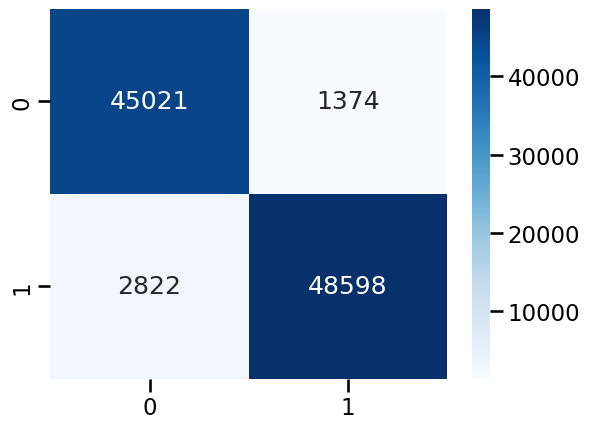

In [ ]:
sns.set_context("talk")
cm= confusion_matrix(gs_pred, y_test)
ax= sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')